##**#CODEDANIEL**
Linear & Multi Regression

In [28]:
import pandas as pd
import numpy as np

import statsmodels.api

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import statsmodels.api

%matplotlib inline 

This code imports several Python libraries for data analysis and visualization.

**import pandas as pd:** imports the pandas library, which is a popular tool for data manipulation and analysis.

**import numpy as np:** imports the NumPy library, which provides support for large, multi-dimensional arrays and matrices, as well as a range of mathematical functions to operate on them.

**import statsmodels.api:** imports the statsmodels library, which provides a wide range of statistical models and tests for use in data analysis and machine learning.

**import matplotlib.pyplot as plt:** imports the pyplot module from the Matplotlib library, which provides a range of functions for creating visualizations such as plots and charts.

**from sklearn.linear_model import LinearRegression:** imports the LinearRegression class from the scikit-learn library, which provides a range of machine learning tools for data analysis and modeling.

**import statsmodels.api:** imports the statsmodels library again. This line is redundant, as the library has already been imported earlier in the code.

%matplotlib inline: sets up Jupyter Notebook to display plots inline (i.e., within the notebook itself), rather than in separate windows or files.

Overall, this code sets up a range of tools and libraries for data analysis and visualization, which will be used later in the code to build and analyze a linear regression model of the relationship between TV ad spending and sales.





In [29]:
data = pd.read_csv('https://raw.githubusercontent.com/marcopeix/datasciencewithmarco/master/data/Advertising.csv', index_col=0)

Reading the Dataset

In [30]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


##Simple Linear Regression


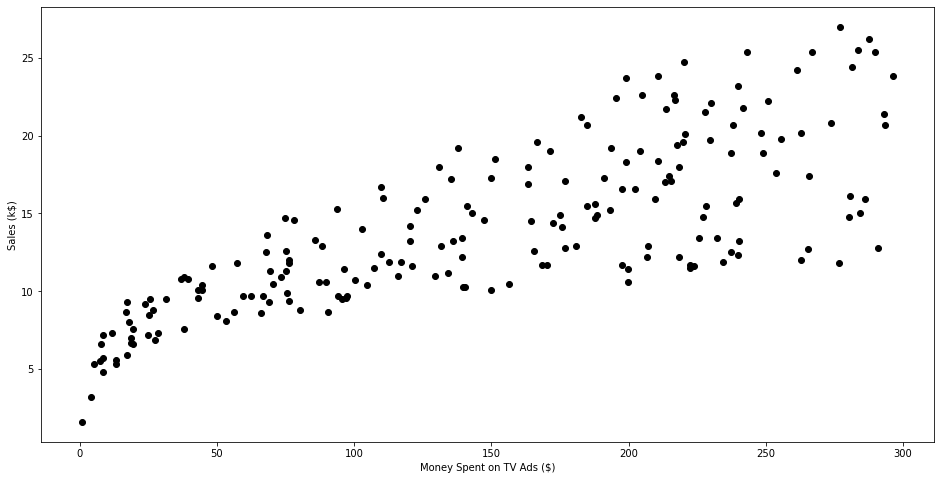

In [31]:
plt.figure(figsize=(16,8))
plt.scatter(data['TV'], data['sales'], c='black')
plt.xlabel('Money Spent on TV Ads ($)')
plt.ylabel('Sales (k$)')
plt.show()

**plt.figure(figsize=(16,8)):** creates a new figure with the specified width and height (in inches). This line is not strictly necessary, but it's a good practice to use it to set the size of the figure before creating any plots.

**plt.scatter(data['TV'], data['sales'], c='black'):** creates a scatter plot of the 'TV' and 'sales' variables, with the 'TV' variable on the x-axis and the 'sales' variable on the y-axis. Each point in the plot corresponds to one data point in the dataset, and its position is determined by the values of the 'TV' and 'sales' variables for that data point. The c='black' argument sets the color of the points to black.



In [32]:
X = data['TV'].values.reshape(-1,1)
y = data['sales'].values.reshape(-1,1)

reg = LinearRegression() 
reg.fit(X,y)

print(f"The Linear Model is: \n Y = (reg.intercept_[0]) + (reg.coef_[0][0]*TV")

The Linear Model is: 
 Y = (reg.intercept_[0]) + (reg.coef_[0][0]*TV


**X = data['TV'].values.reshape(-1,1):** selects the 'TV' column of the dataset, converts it to a one-dimensional NumPy array using the values attribute, and then converts it to a two-dimensional NumPy array with one column using the reshape() method. This is assigned to the variable X.

**y = data['sales'].values.reshape(-1,1):** selects the 'sales' column of the dataset, converts it to a one-dimensional NumPy array using the values attribute, and then converts it to a two-dimensional NumPy array with one column using the reshape() method. This is assigned to the variable y.

**reg = LinearRegression():** creates an instance of the LinearRegression class and assigns it to the variable reg.

**reg.fit(X,y):** fits the simple linear regression model using X as the predictor variable and y as the response variable.

**print(f"The Linear Model is:** \n Y = (reg.intercept_[0]) + (reg.coef_[0][0]*TV"): prints the equation of the linear model, including the intercept term and the coefficient of the 'TV' variable

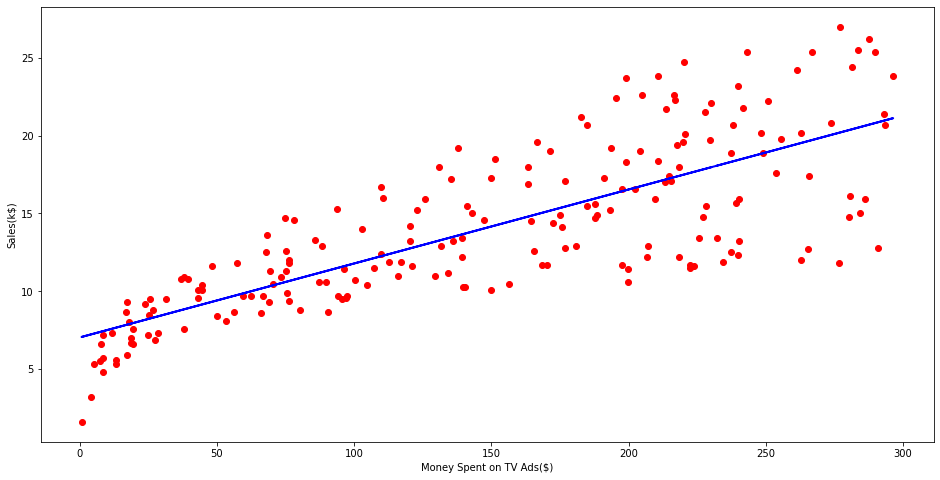

In [33]:
#Plotting the LINE
predictions = reg.predict(X)

plt.figure(figsize=(16,8))
plt.scatter(X,y, c="RED")
plt.plot(X, predictions, c="blue", linewidth=2)

plt.xlabel('Money Spent on TV Ads($)')
plt.ylabel('Sales(k$)')
plt.show()

predictions = reg.predict(X): uses the fitted linear regression model to make predictions of the response variable for each value of the predictor variable in X. The predicted values are assigned to the variable predictions.

plt.figure(figsize=(16,8)): creates a new figure object with a specified size of 16 inches by 8 inches.

plt.scatter(X,y, c="RED"): creates a scatter plot of the 'TV' variable (X) on the x-axis and the 'sales' variable (y) on the y-axis, with red dots representing the data points.

plt.plot(X, predictions, c="blue", linewidth=2): overlays a blue line on top of the scatter plot, representing the linear regression line that was fitted using the data. The line is plotted using the predicted values (predictions) on the y-axis and the 'TV' variable (X) on the x-axis.

plt.xlabel('Money Spent on TV Ads($)'): adds a label to the x-axis of the plot.

plt.ylabel('Sales(k$)'): adds a label to the y-axis of the plot.

plt.show(): displays the plot on the screen.

##Access the Quality of Our Model

In [40]:
import statsmodels.api as sm

In [41]:
X = data['TV']
y = data['sales']

exog = sm.add_constant(X)
est = sm.OLS(y, exog).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 18 Feb 2023   Prob (F-statistic):           1.47e-42
Time:                        10:21:01   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


X = data['TV']: selects the 'TV' column of the dataset and assigns it to the variable X.

y = data['sales']: selects the 'sales' column of the dataset and assigns it to the variable y.

exog = sm.add_constant(X): adds a column of ones to the X variable to serve as the intercept term and assigns the result to exog.

est = sm.OLS(y, exog).fit(): fits an ordinary least squares (OLS) regression model using y as the response variable and exog as the predictor variable, then assigns the result to est.

print(est.summary()): prints a summary of the regression results, which includes information such as the coefficients, standard errors, t-values, and p-values of the predictor variable(s), as well as goodness-of-fit statistics like R-squared and the F-statistic.

##**MultiLinear** **Regression**

In [48]:
Xs = data.drop(['sales'], axis=1)
y = data['sales'].values.reshape(-1, 1)

reg = LinearRegression()
reg.fit(Xs, y)

print(f"The Linear Model is: \n Y = {reg.intercept_[0]} + {reg.coef_[0][0]}*TV + {reg.coef_[0][1]}*radio + {reg.coef_[0][2]}*newspaper")

The Linear Model is: 
 Y = 2.938889369459412 + 0.0457646454553976*TV + 0.18853001691820448*radio + -0.0010374930424763285*newspaper


Xs = data.drop(['sales'], axis=1): selects all the columns of the dataset except for 'sales' and assigns them to the variable Xs.

y = data['sales'].values.reshape(-1, 1): selects the 'sales' column of the dataset and converts it to a two-dimensional NumPy array with one column using the reshape() method. This is assigned to the variable y.

reg = LinearRegression(): creates an instance of the LinearRegression class and assigns it to the variable reg.

reg.fit(Xs, y): fits the linear regression model using Xs as the predictor variables and y as the response variable.

print(f"The Linear Model is: \n Y = {reg.intercept_[0]} + {reg.coef_[0][0]}*TV + {reg.coef_[0][1]}*radio + {reg.coef_[0][2]}*newspaper"): prints the equation of the linear model, including the intercept term and the coefficients of the predictor variables.

In [54]:
X = np.column_stack((data['TV'], data['radio'], data['newspaper']))
y = data['sales'].values.reshape(-1,1)

exog = sm.add_constant(X)
est = sm.OLS(y,exog).fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 18 Feb 2023   Prob (F-statistic):           1.58e-96
Time:                        11:41:48   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

**X = np.column_stack((data['TV'], data['radio'], data['newspaper'])): **creates a matrix X with three columns, corresponding to the 'TV', 'radio', and 'newspaper' variables, respectively. This line stacks the columns horizontally using the np.column_stack() function from NumPy.

**y = data['sales'].values.reshape(-1,1):** creates a column vector y containing the 'sales' variable, reshaped to have one column and as many rows as the original data. This line uses the .values attribute of a pandas DataFrame to get the underlying data as a NumPy array, and then applies the .reshape() method to convert it to the desired shape.

**exog = sm.add_constant(X):** adds a constant column to the matrix X using the add_constant() function from statsmodels. This constant term is needed to fit the intercept term in the regression model.

**est = sm.OLS(y,exog).fit()**: fits a multiple linear regression model to the data, using the ordinary least squares (OLS) method from statsmodels. This line creates a new object est of the OLS class, and applies its .fit() method to the data. This method estimates the regression coefficients by minimizing the sum of squared residuals between the predicted values and the actual values, and returns an object of the RegressionResults class that contains various statistics and diagnostics about the model.

print(est.summary()): prints a summary of the regression results to the console. This line applies the .summary() method to the RegressionResults object est, which formats and prints a detailed report of the model statistics, including the coefficients, standard errors, t-statistics, p-values, and various goodness-of-fit measures.